# Table of Contents
<a id="toc"></a>
- [1. Project Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. Visualize Bird Species](#3)
- [4. Data Preprocessing](#4)
- [5. Spliting the data into Training and Testing Data](#5)
- [6. Normalization](#6)
- [7. Label Binarizing](#7)
- [8. Spliting the Training data into Training and Validation Data](#8)
- [9. ANN](#9)
- [10. CNN](#10)
- [11. Evaluation](#11)

<a id='1'></a>
# Project Description

In this project, i will be working on Intel images i.e. images of buildings, forest, street, etc. This is a multi class classification problem.<br>
the data contains 6 classes:<br><br>
**1 - Buildings<br><br>**
<img src='Data/Intel Image Dataset/buildings/20057.jpg' width=250 height=250><br><br>
**2 - Forest<br><br>**
<img src='Data/Intel Image Dataset/forest/20082.jpg' width=250 height=250><br><br>
**3 - Glacier<br><br>**
<img src='Data/Intel Image Dataset/glacier/20059.jpg' width=250 height=250><br><br>
**4 - Mountain<br><br>**
<img src='Data/Intel Image Dataset/mountain/20093.jpg' width=250 height=250><br><br>
**5 - Sea<br><br>**
<img src='Data/Intel Image Dataset/sea/20072.jpg' width=250 height=250><br><br>
**6 - Street<br><br>**
<img src='Data/Intel Image Dataset/street/20075.jpg' width=250 height=250><br><br>

<a id='2'></a>
# Import Necssaries Libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from seaborn import heatmap
import cv2
import random
from os import listdir
from PIL import Image

from sklearn.preprocessing import  LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from tensorflow.math import confusion_matrix
from tensorflow.keras import callbacks
from tensorflow.keras.models import load_model

In [2]:
path = "Data/Intel Image Dataset/mountain"
listdir(path)

['20058.jpg',
 '20068.jpg',
 '20071.jpg',
 '20085.jpg',
 '20093.jpg',
 '20107.jpg',
 '20116.jpg',
 '20120.jpg',
 '20123.jpg',
 '20129.jpg',
 '20133.jpg',
 '20144.jpg',
 '20153.jpg',
 '20154.jpg',
 '20157.jpg',
 '20160.jpg',
 '20174.jpg',
 '20176.jpg',
 '20181.jpg',
 '20189.jpg',
 '20226.jpg',
 '20232.jpg',
 '20271.jpg',
 '20276.jpg',
 '20277.jpg',
 '20282.jpg',
 '20304.jpg',
 '20314.jpg',
 '20320.jpg',
 '20327.jpg',
 '20334.jpg',
 '20356.jpg',
 '20358.jpg',
 '20363.jpg',
 '20378.jpg',
 '20379.jpg',
 '20397.jpg',
 '20398.jpg',
 '20401.jpg',
 '20427.jpg',
 '20435.jpg',
 '20438.jpg',
 '20443.jpg',
 '20444.jpg',
 '20455.jpg',
 '20479.jpg',
 '20497.jpg',
 '20512.jpg',
 '20522.jpg',
 '20528.jpg',
 '20545.jpg',
 '20554.jpg',
 '20559.jpg',
 '20565.jpg',
 '20575.jpg',
 '20577.jpg',
 '20584.jpg',
 '20585.jpg',
 '20589.jpg',
 '20590.jpg',
 '20599.jpg',
 '20608.jpg',
 '20612.jpg',
 '20613.jpg',
 '20617.jpg',
 '20626.jpg',
 '20627.jpg',
 '20643.jpg',
 '20651.jpg',
 '20655.jpg',
 '20657.jpg',
 '2066

<a id='3'></a>
# Visualize Intel Classes

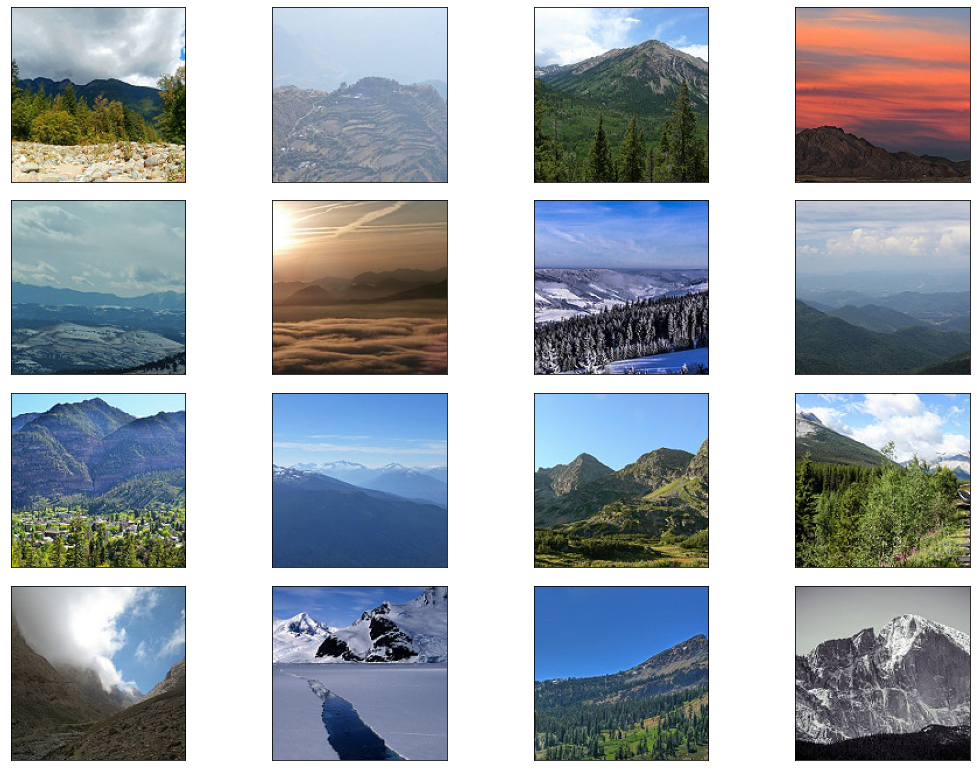

In [14]:
# Plotting 25 images to check dataset
plt.figure(figsize=(15,11))
path = "Data/Intel Image Dataset/mountain"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

In [15]:
print(f'Mountains Images shape is: {rand_img.shape[0]}*{rand_img.shape[1]} Pixels')

Mountains Images shape is: 150*150 Pixels


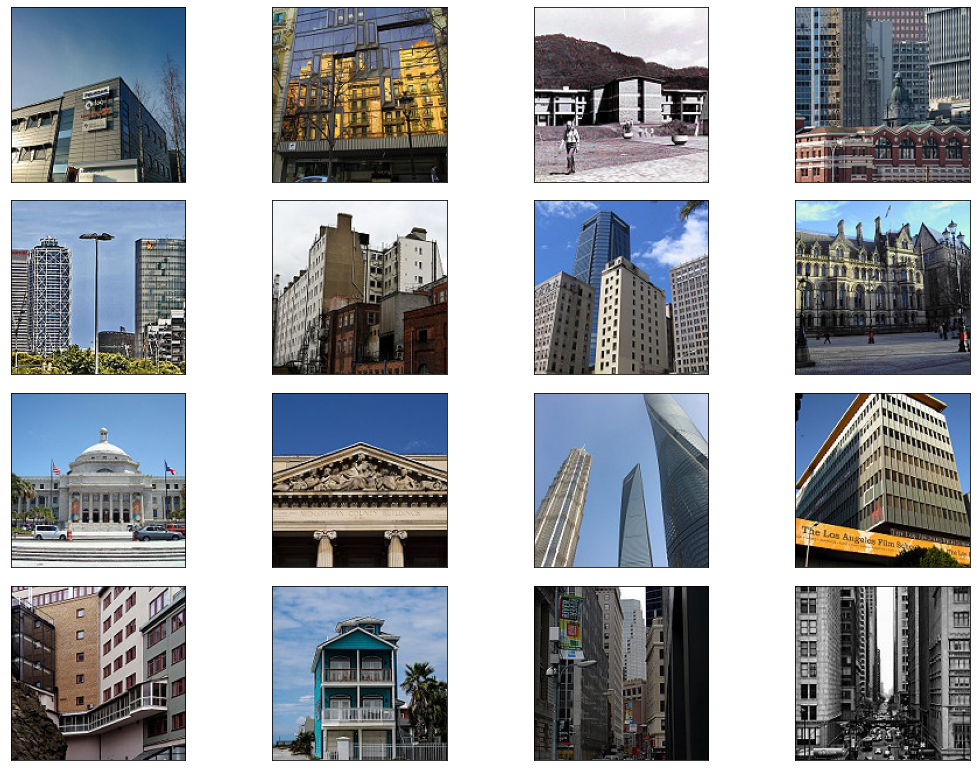

In [16]:
# Plotting 25 images to check dataset
plt.figure(figsize=(15,11))
path = "Data/Intel Image Dataset/buildings"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img2 = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img2)
    plt.xticks([])
    plt.yticks([])

In [17]:
print(f'Buildings Images shape is: {rand_img2.shape[0]}*{rand_img2.shape[1]} Pixels')

Buildings Images shape is: 150*150 Pixels


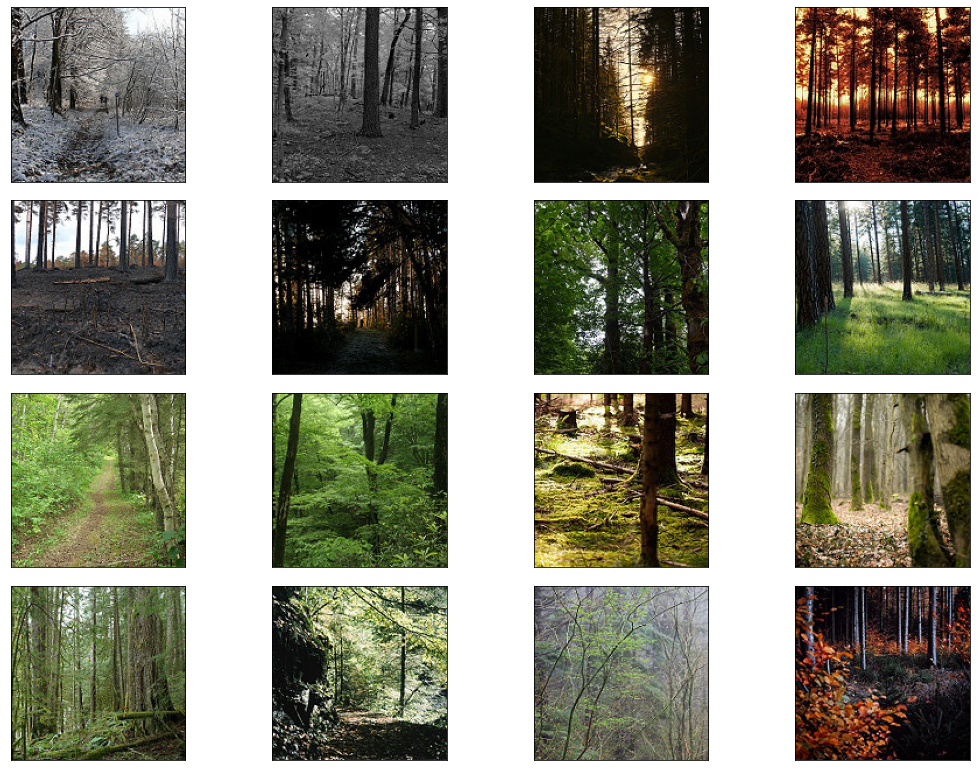

In [18]:
plt.figure(figsize=(15,11))
path = "Data/Intel Image Dataset/forest"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img3 = imread(path + '/' + random.choice(sorted(listdir(path))))
    plt.imshow(rand_img3)
    plt.xticks([])
    plt.yticks([])

In [19]:
print(f'Forestes Images shape is: {rand_img3.shape[0]}*{rand_img3.shape[1]} Pixels')

Forestes Images shape is: 150*150 Pixels


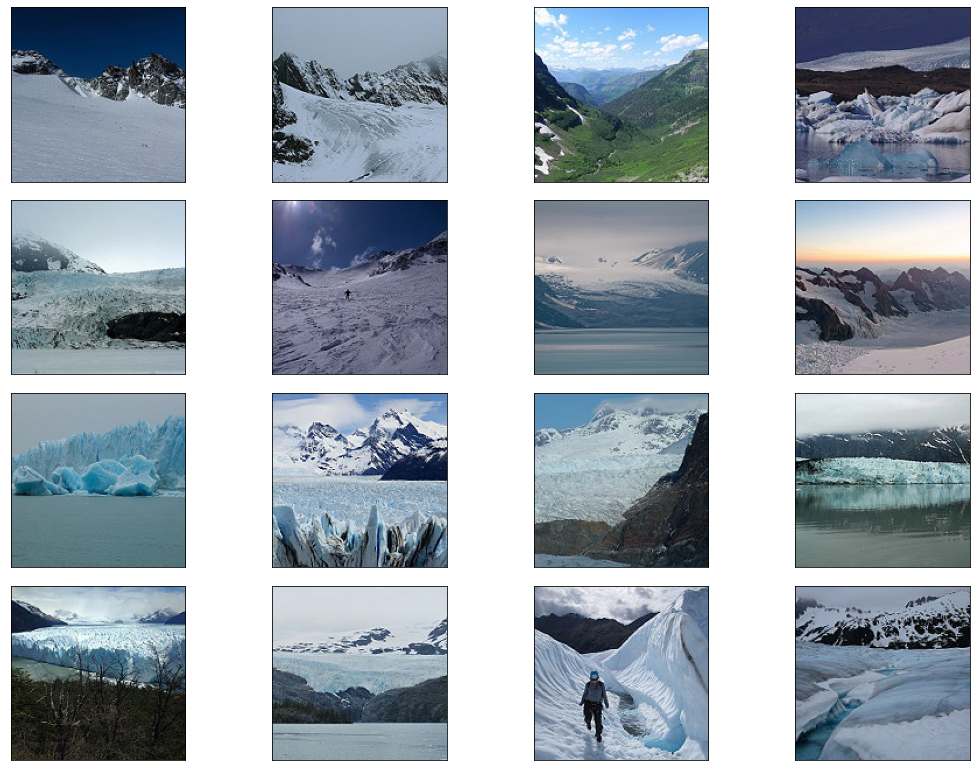

In [20]:
plt.figure(figsize=(15,11))
path = "Data/Intel Image Dataset/glacier"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img4 = imread(path + '/' + random.choice(sorted(listdir(path))))
    plt.imshow(rand_img4)
    plt.xticks([])
    plt.yticks([])

In [21]:
print(f'Glaciers Images shape is: {rand_img4.shape[0]}*{rand_img4.shape[1]} Pixels')

Glaciers Images shape is: 150*150 Pixels


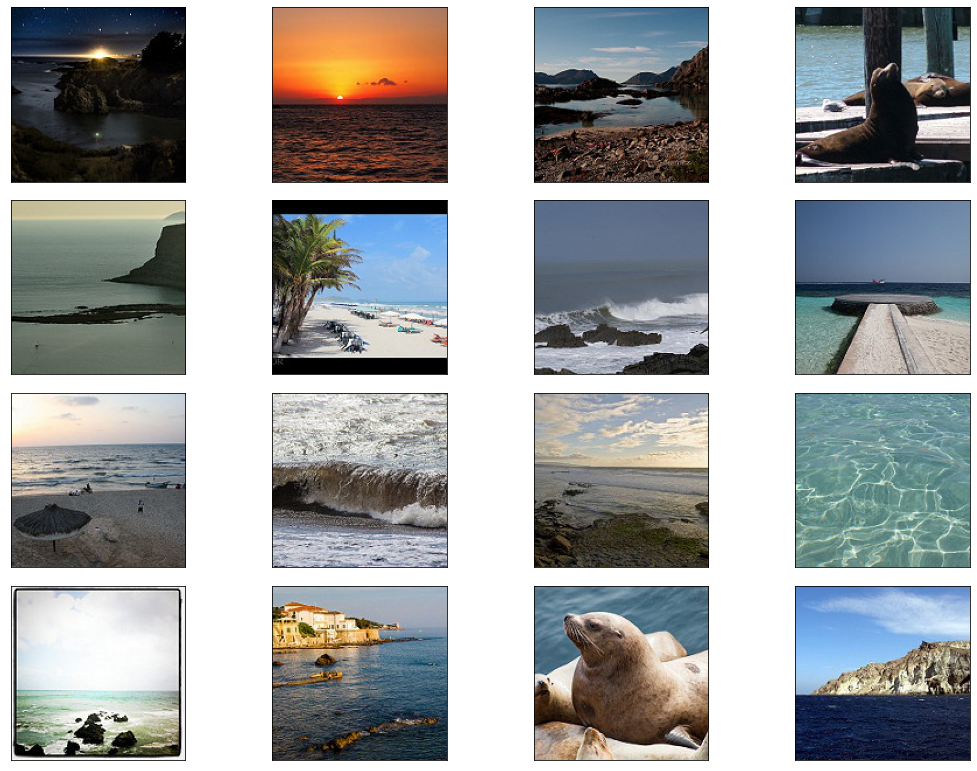

In [22]:
plt.figure(figsize=(15,11))
path = "Data/Intel Image Dataset/sea"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img5 = imread(path + '/' + random.choice(sorted(listdir(path))))
    plt.imshow(rand_img5)
    plt.xticks([])
    plt.yticks([])

In [23]:
print(f'Sea Images shape is: {rand_img5.shape[0]}*{rand_img5.shape[1]} Pixels')

Sea Images shape is: 150*150 Pixels


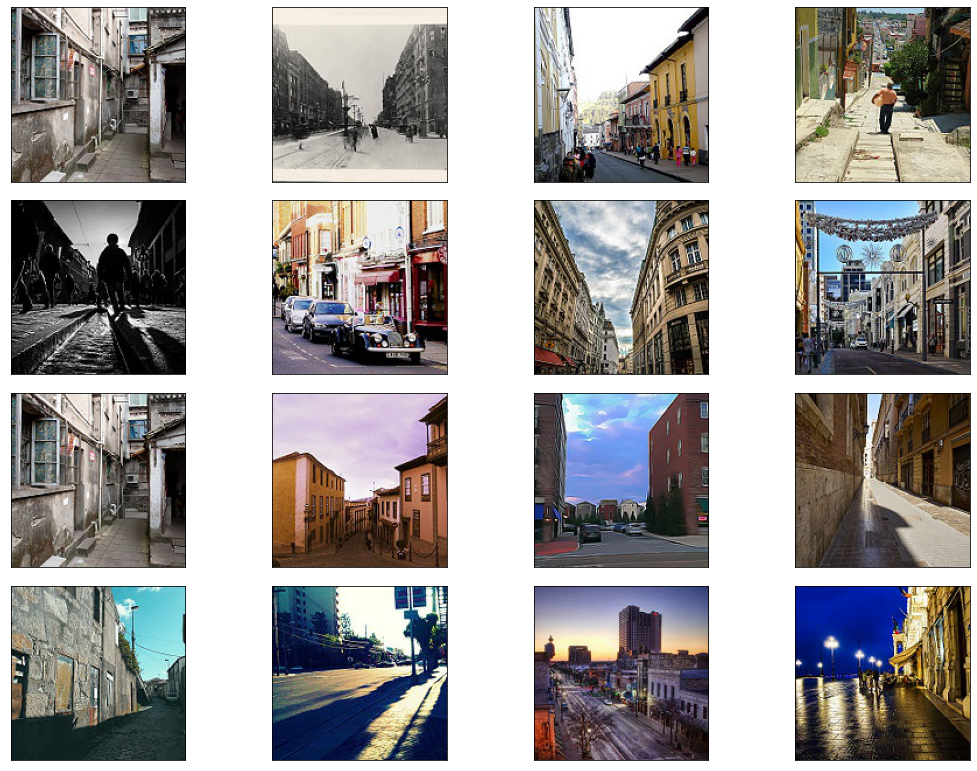

In [24]:
plt.figure(figsize=(15,11))
path = "Data/Intel Image Dataset/street"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img6 = imread(path + '/' + random.choice(sorted(listdir(path))))
    plt.imshow(rand_img6)
    plt.xticks([])
    plt.yticks([])

In [25]:
print(f'Streets Images shape is: {rand_img6.shape[0]}*{rand_img6.shape[1]} Pixels')

Streets Images shape is: 150*150 Pixels


<a id='4'></a>
# Data Preprocessing

In [26]:
# Setting root directory path and creating empty list
dir = "Data/Intel Image Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

In [27]:
root_dir

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [28]:
# Reading and converting image to numpy array
for directory in root_dir:
    for files in listdir(f"{dir}/{directory}"):
        image_path = f"{dir}/{directory}/{files}"
        image = Image.open(image_path)
        image = image.resize((150,150)) # All images maybe does not have same dimension so reshaping is good thing to take precautions
        image = img_to_array(image)
        image_list.append(image)
        label_list.append(directory)

In [29]:
image_list[0]

array([[[ 90., 119., 179.],
        [113., 140., 195.],
        [100., 124., 168.],
        ...,
        [111., 147., 205.],
        [112., 148., 206.],
        [112., 148., 206.]],

       [[ 85., 113., 163.],
        [155., 181., 230.],
        [140., 163., 205.],
        ...,
        [105., 147., 207.],
        [106., 148., 208.],
        [106., 148., 208.]],

       [[127., 153., 186.],
        [137., 161., 197.],
        [156., 175., 215.],
        ...,
        [101., 146., 205.],
        [101., 146., 205.],
        [101., 146., 205.]],

       ...,

       [[196., 208., 224.],
        [196., 208., 224.],
        [197., 206., 223.],
        ...,
        [224., 230., 242.],
        [226., 233., 243.],
        [228., 235., 245.]],

       [[195., 206., 224.],
        [195., 206., 224.],
        [195., 206., 224.],
        ...,
        [224., 230., 242.],
        [228., 235., 245.],
        [232., 239., 249.]],

       [[192., 205., 222.],
        [192., 205., 222.],
        [193., 2

In [30]:
print(f"Our data contains {len(image_list)} images with different classes")

Our data contains 3000 images with different classes


In [31]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

glacier      553
mountain     525
sea          510
street       501
forest       474
buildings    437
dtype: int64

In [32]:
num_classes = len(label_counts)
num_classes

6

In [33]:
np.array(image_list).shape

(3000, 150, 150, 3)

In [34]:
# Checking y data shape
label_list = np.array(label_list)
label_list.shape

(3000,)

<a id='5'></a>
# Spliting the data into Training and Testing

In [35]:
# 80% train dataset 20% testing dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [36]:
print(f"Number of Training dataset: {len(x_train)}")
print(f"Number of Testing dataset: {len(x_test)}")

Number of Training dataset: 2400
Number of Testing dataset: 600


<a id='6'></a>
# Normalization

In [37]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 150,150,3)
x_test = x_test.reshape( -1, 150,150,3)

In [38]:
x_train[0]

array([[[0.609 , 0.573 , 0.4712],
        [0.6177, 0.5864, 0.5024],
        [0.6846, 0.662 , 0.5776],
        ...,
        [0.7646, 0.7246, 0.649 ],
        [0.622 , 0.6177, 0.529 ],
        [1.    , 1.022 , 0.9243]],

       [[0.6133, 0.6   , 0.5156],
        [0.582 , 0.569 , 0.5024],
        [0.6533, 0.6445, 0.5776],
        ...,
        [0.9243, 0.871 , 0.8   ],
        [1.    , 0.987 , 0.9023],
        [1.066 , 1.075 , 0.9824]],

       [[0.662 , 0.6445, 0.5913],
        [0.6177, 0.6   , 0.56  ],
        [0.729 , 0.7153, 0.676 ],
        ...,
        [0.938 , 0.898 , 0.8223],
        [0.573 , 0.542 , 0.4622],
        [0.573 , 0.56  , 0.4756]],

       ...,

       [[0.6133, 0.573 , 0.542 ],
        [0.6357, 0.5957, 0.5645],
        [0.5776, 0.5376, 0.507 ],
        ...,
        [0.8047, 0.8135, 0.7554],
        [0.818 , 0.8267, 0.778 ],
        [0.84  , 0.8535, 0.8047]],

       [[0.28  , 0.24  , 0.2178],
        [0.28  , 0.24  , 0.2178],
        [0.2844, 0.2444, 0.2222],
        .

<a id='7'></a>
# Label Binarizing

In [39]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [40]:
y_train[0]

array([0, 0, 0, 0, 0, 1])

<a id='8'></a>
# Spliting the Training data into Train and validation data

In [41]:
# Training data 80% validation data 20%
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [42]:
print(f"Number of Training dataset: {len(x_train)}\nNumber of Testing dataset: {len(x_test)}\nNumber of Validation dataset: {len(x_val)}")

Number of Training dataset: 1920
Number of Testing dataset: 600
Number of Validation dataset: 480


<a id='9'></a>
# ANN

In [59]:
def load_model(): 
    model = Sequential([
        Flatten(input_shape=(150,150,3)),
        Dense(512, activation ='relu'),
        Dense(256, activation ='relu'),
        Dense(128, activation ='relu'),
        Dense(num_classes, activation='softmax'),
    ])
    model.compile(
        optimizer= Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['acc'],
    )
    return model
    
    
early_stopping = callbacks.EarlyStopping(
        patience=10,
        min_delta=0,
        monitor='val_loss',
        restore_best_weights=True,
        verbose=0,
        mode='min', 
        baseline=None,
    )
plateau = callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=4, 
            verbose=0,
            mode='min')

ann_model = load_model()
history_ann = ann_model.fit(  x_train , y_train,
                validation_data = (x_val , y_val),
                epochs = 1000,
                callbacks = [early_stopping , plateau],
              )

Epoch 1/1000
60/60 [==============================] - 7s 109ms/step - loss: 7.3130 - acc: 0.2724 - val_loss: 2.1956 - val_acc: 0.3313 - lr: 5.0000e-04
Epoch 2/1000
60/60 [==============================] - 6s 104ms/step - loss: 2.3344 - acc: 0.3745 - val_loss: 2.6584 - val_acc: 0.3167 - lr: 5.0000e-04
Epoch 3/1000
60/60 [==============================] - 6s 104ms/step - loss: 1.6732 - acc: 0.4542 - val_loss: 1.6844 - val_acc: 0.4333 - lr: 5.0000e-04
Epoch 4/1000
60/60 [==============================] - 6s 103ms/step - loss: 1.4849 - acc: 0.4896 - val_loss: 1.8342 - val_acc: 0.4354 - lr: 5.0000e-04
Epoch 5/1000
60/60 [==============================] - 6s 104ms/step - loss: 1.5040 - acc: 0.4969 - val_loss: 1.5937 - val_acc: 0.4396 - lr: 5.0000e-04
Epoch 6/1000
60/60 [==============================] - 6s 103ms/step - loss: 1.2850 - acc: 0.5359 - val_loss: 1.8396 - val_acc: 0.3854 - lr: 5.0000e-04
Epoch 7/1000
60/60 [==============================] - 6s 104ms/step - loss: 1.1453 - acc: 0.59

**ANN Model Acc Plot**

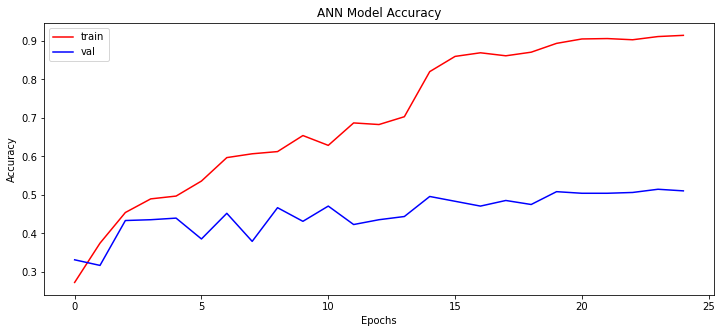

In [62]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history_ann.history['acc'], color='r')
plt.plot(history_ann.history['val_acc'], color='b')
plt.title('ANN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

**CNN Model Loss Plot**

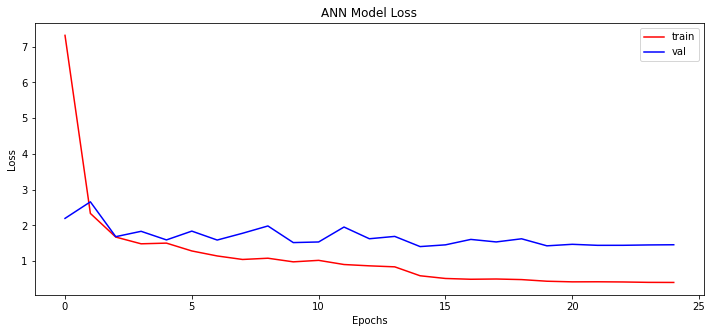

In [63]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history_ann.history['loss'], color='r')
plt.plot(history_ann.history['val_loss'], color='b')
plt.title('ANN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

<a id='10'></a>
# CNN

**Build CNN**

In [48]:
cnn_model = Sequential([
        Conv2D(16, kernel_size = (3,3),input_shape = (150,150,3)),
        LeakyReLU(),
          
        Conv2D(32, kernel_size = (3,3)),
        LeakyReLU(),
        MaxPooling2D(5,5),
        
        Conv2D(64, kernel_size = (3,3)),
        LeakyReLU(),
        
        Conv2D(128, kernel_size = (3,3)),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Flatten(),
    
        Dense(64),
        Dropout(rate = 0.2),
        LeakyReLU(),
        
        Dense(32),
        Dropout(rate = 0.2),
        LeakyReLU(),
    
        Dense(16),
        Dropout(rate = 0.2),
        LeakyReLU(1),
    
        Dense(num_classes, activation = 'softmax')    
        ])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 148, 148, 16)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 146, 146, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 27, 27, 64)        18496     
                                                      

**Compile and train CNN model**

In [49]:
cnn_model.compile(loss = 'categorical_crossentropy', 
              optimizer = Adam(0.0005),
              metrics=['acc'])
epochs = 1000
batch_size = 128

mc = callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', patience = 10 ,save_best_only=True)

early_stopping = callbacks.EarlyStopping(
        patience=50,
        min_delta=0,
        monitor='val_loss',
        restore_best_weights=True,
        verbose=0,
        mode='min', 
       baseline=None,
    )

plateau = callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=4, 
            verbose=0,
            mode='min')

history = cnn_model.fit(x_train, y_train, 
                    batch_size = batch_size, 
                    epochs = epochs, 
                    validation_data = (x_val, y_val),
                    callbacks=[early_stopping, plateau, mc])


Epoch 1/1000
15/15 [==============================] - 21s 1s/step - loss: 1.7054 - acc: 0.2589 - val_loss: 1.4782 - val_acc: 0.3750 - lr: 5.0000e-04
Epoch 2/1000
15/15 [==============================] - 20s 1s/step - loss: 1.4248 - acc: 0.3849 - val_loss: 1.2533 - val_acc: 0.4771 - lr: 5.0000e-04
Epoch 3/1000
15/15 [==============================] - 20s 1s/step - loss: 1.2773 - acc: 0.4854 - val_loss: 1.1371 - val_acc: 0.5208 - lr: 5.0000e-04
Epoch 4/1000
15/15 [==============================] - 21s 1s/step - loss: 1.2148 - acc: 0.5208 - val_loss: 1.0616 - val_acc: 0.5833 - lr: 5.0000e-04
Epoch 5/1000
15/15 [==============================] - 21s 1s/step - loss: 1.1362 - acc: 0.5641 - val_loss: 0.9978 - val_acc: 0.5792 - lr: 5.0000e-04
Epoch 6/1000
15/15 [==============================] - 21s 1s/step - loss: 1.0604 - acc: 0.5807 - val_loss: 0.9121 - val_acc: 0.6250 - lr: 5.0000e-04
Epoch 7/1000
15/15 [==============================] - 21s 1s/step - loss: 1.0270 - acc: 0.6052 - val_loss:

Epoch 56/1000
15/15 [==============================] - 24s 2s/step - loss: 0.3759 - acc: 0.8667 - val_loss: 0.6891 - val_acc: 0.7833 - lr: 1.2800e-09
Epoch 57/1000
15/15 [==============================] - 25s 2s/step - loss: 0.3754 - acc: 0.8833 - val_loss: 0.6891 - val_acc: 0.7833 - lr: 1.2800e-09
Epoch 58/1000
15/15 [==============================] - 22s 1s/step - loss: 0.3877 - acc: 0.8698 - val_loss: 0.6891 - val_acc: 0.7833 - lr: 1.2800e-09
Epoch 59/1000
15/15 [==============================] - 25s 2s/step - loss: 0.3746 - acc: 0.8776 - val_loss: 0.6891 - val_acc: 0.7833 - lr: 2.5600e-10
Epoch 60/1000
15/15 [==============================] - 24s 2s/step - loss: 0.4001 - acc: 0.8677 - val_loss: 0.6891 - val_acc: 0.7833 - lr: 2.5600e-10
Epoch 61/1000
15/15 [==============================] - 22s 1s/step - loss: 0.3736 - acc: 0.8792 - val_loss: 0.6891 - val_acc: 0.7833 - lr: 2.5600e-10
Epoch 62/1000
15/15 [==============================] - 24s 2s/step - loss: 0.3931 - acc: 0.8641 - va

In [51]:
model = load_model('best_model.h5')

**CNN Model Accuarcy on validation data**

In [52]:
model.evaluate(x_val, y_val)

15/15 [==============================] - 1s 74ms/step - loss: 0.6636 - acc: 0.7667


[0.6635669469833374, 0.7666666507720947]

**CNN Model Accuarcy on Testing data**

In [53]:
model.evaluate(x_test, y_test)

19/19 [==============================] - 1s 72ms/step - loss: 0.6558 - acc: 0.7700


[0.6558315753936768, 0.7699999809265137]

**CNN Model Acc Plot**

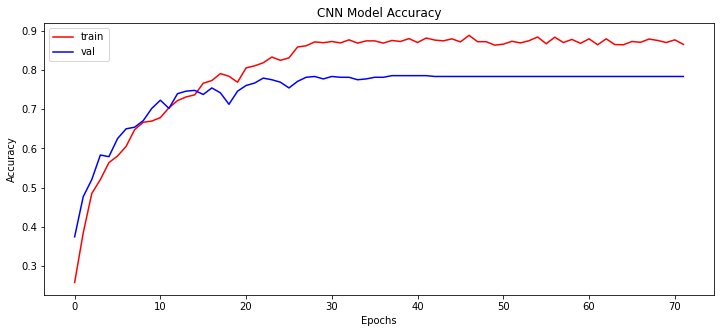

In [64]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['acc'], color='r')
plt.plot(history.history['val_acc'], color='b')
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

**CNN Model Loss Plot**

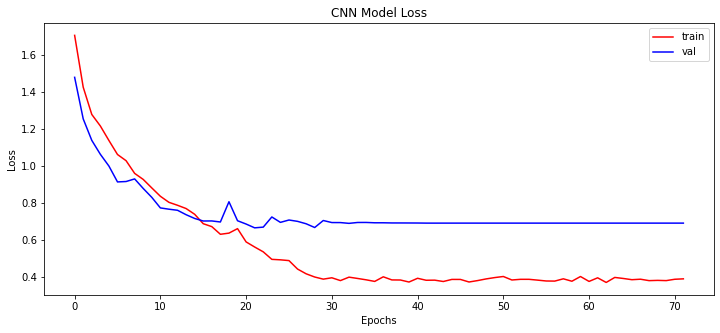

In [66]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
y_pred = cnn_model.predict(x_test)

In [72]:
y_pred

array([[1.9541137e-02, 4.2138575e-03, 4.2880595e-02, 9.1722262e-01,
        1.5369657e-02, 7.7209418e-04],
       [9.7056592e-01, 4.1095499e-04, 3.4741758e-04, 3.4005276e-03,
        5.6846970e-04, 2.4706697e-02],
       [6.0065911e-04, 9.5142500e-04, 9.4275916e-01, 2.6757196e-02,
        2.7127665e-02, 1.8038609e-03],
       ...,
       [1.7655537e-02, 1.3571997e-02, 1.9295876e-01, 1.2353149e-01,
        6.4190423e-01, 1.0378009e-02],
       [2.3711139e-01, 3.6069340e-01, 2.2039304e-03, 2.2084825e-03,
        3.2156131e-03, 3.9456722e-01],
       [4.4695890e-01, 6.3903304e-03, 5.6590309e-04, 8.0580905e-04,
        2.4949686e-04, 5.4502952e-01]], dtype=float32)

In [73]:
y_pred.shape

(600, 6)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [76]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [78]:
y_predicted_labels[0:10]

[3, 0, 2, 2, 1, 3, 2, 2, 4, 5]

In [80]:
y_predicted_labels = np.array(y_predicted_labels)
y_predicted_labels.shape

(600,)

In [81]:
y_test.shape

(600,)

In [82]:
y_test[0:10]

array(['mountain', 'buildings', 'glacier', 'glacier', 'forest',
       'mountain', 'street', 'glacier', 'sea', 'street'], dtype='<U9')

In [83]:
y_test = np.where(y_test == 'buildings', 0, y_test) 
y_test = np.where(y_test == 'forest', 1, y_test) 
y_test = np.where(y_test == 'glacier', 2, y_test) 
y_test = np.where(y_test == 'mountain', 3, y_test) 
y_test = np.where(y_test == 'sea', 4, y_test) 
y_test = np.where(y_test == 'street', 5, y_test)
y_test[0:10]

array(['3', '0', '2', '2', '1', '3', '5', '2', '4', '5'], dtype='<U9')

In [84]:
y_test = y_test.astype('int32')
y_test[0:10]

array([3, 0, 2, 2, 1, 3, 5, 2, 4, 5])

In [85]:
cm = confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[ 74,   2,   1,   7,   2,  13],
       [  3,  79,   0,   1,   1,   1],
       [  1,   1, 105,  10,  10,   2],
       [  1,   1,  17,  77,   8,   0],
       [  5,   0,  15,  16,  52,   2],
       [ 14,   3,   1,   0,   0,  75]])>

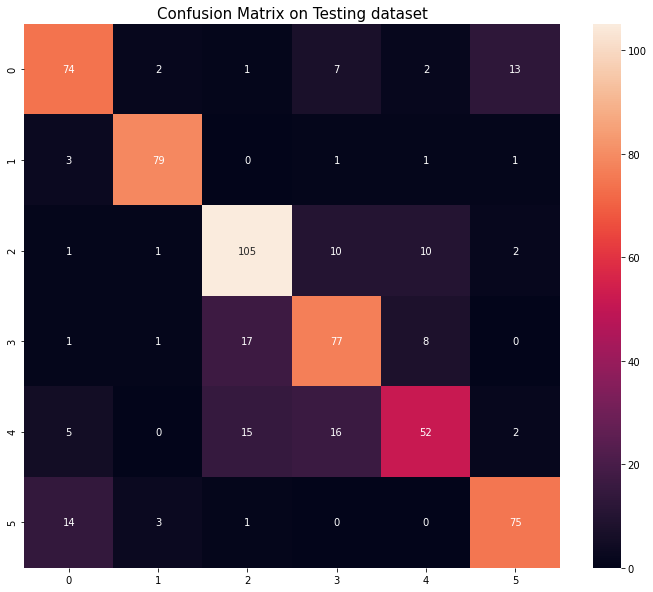

In [93]:
plt.figure(figsize=(12,10))
plt.title('Confusion Matrix on Testing dataset', {'fontsize' : '15'})
heatmap(cm, annot=True, fmt='d');

In [96]:
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75        99
           1       0.92      0.93      0.92        85
           2       0.76      0.81      0.78       129
           3       0.69      0.74      0.72       104
           4       0.71      0.58      0.64        90
           5       0.81      0.81      0.81        93

    accuracy                           0.77       600
   macro avg       0.77      0.77      0.77       600
weighted avg       0.77      0.77      0.77       600



<a id='11'></a>
# Evaluation

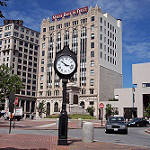

In [57]:
# Plotting image to compare
img = array_to_img(x_test[1])
img

In [58]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[1])])
print("Predicted : ",labels[np.argmax(y_pred[1])])

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Originally :  buildings
Predicted :  buildings
